# Genome | Trials

This is a research based on a genome trial.

In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import statistics as stat
import numpy as np
from collections import Counter
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [2]:
pio.renderers.default = 'colab'
matplotlib.rcParams['font.size'] = 18
sns.set_theme(style="darkgrid")
sns.set_context('talk', font_scale=1.2);


In [22]:
# df = pd.read_csv("./work/biomed_01_2021/genes2.csv")
df = pd.read_csv("./work/biomed_01_2021/genes.csv")
# df = pd.read_csv("./work/biomed_01_2021/genes3.csv")
cd34_df = pd.read_csv("./work/biomed_01_2021/cd34_genes.csv")

In [ ]:
cd34_df

In [4]:
df

,Patient,Checkpoint,Bracket,Category,APC,AXIN1,BIRC5,CCNA1,CCNA2,CCND2,...,TLE1,TLE2,TLE3,TLE4,CCND1,CCNB1,CCNB2,FOXM1,CXCR4,CDC25C
0,MNC 0032IW,3M,<1%,Safe,0.647290,3.532418e-01,22.00317,1.688183,17.028630,4.567551e+00,...,0.617387,0.549134,2.331381,0.636629,4.684648,10.994170,25.587170,37.955610,0.712914,1.295382e+01
1,MNC 0048,3M,<1%,Safe,1.225298,1.229207e+00,11.82982,0.050357,1.646791,1.700000e-295,...,0.995450,2.086208,3.246996,7.953180,1.372495,1.355900,3.671566,6.625170,1.370853,1.540115e+00
2,MNC 0211LH,3M,<1%,Safe,2.457460,1.513250e-98,16.06914,2.712582,10.143320,3.899543e+00,...,2.012007,NaN,0.063202,21.723090,6.760467,4.572051,4.903969,1.978622,0.063312,3.600000e-293
3,MNC 0426WR,3M,<1%,Safe,1.490196,3.834582e+00,23.91170,0.210341,3.124623,6.390000e-04,...,0.526667,2.441500,1.736104,0.787472,1.925296,3.441253,6.729059,16.530900,0.751943,5.578585e+00
4,MNC 0490TR,3M,<1%,Safe,1.055974,7.135153e-01,13.57256,4.711914,7.811857,1.464649e+00,...,0.269243,0.545847,0.585034,0.525036,4.104306,2.774351,12.330250,22.216470,0.436692,3.056062e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,MNC 0566KAH,18M,<0.1%,Safe,0.225459,4.602928e-01,21.09514,0.281917,9.275509,2.660166e+00,...,0.335401,0.165614,0.145097,0.236796,34.591184,11.100870,9.890529,8.480413,0.062939,1.484239e+01
110,MNC 0407DM,18M,0.1-1%,Steady,1.207691,7.329647e-01,47.40033,0.762941,17.682240,1.444714e+00,...,0.811972,0.654370,0.530989,4.893813,4.089363,17.263390,30.709860,27.788230,0.703092,1.984983e+01
111,MNC 0430LJ,18M,0.1-1%,Steady,2.110925,5.296852e-01,4.85481,0.082426,2.096802,2.500000e-295,...,0.938156,NaN,0.802045,0.236614,8.725682,1.955860,3.329454,2.462294,0.179702,3.876985e+00
112,MNC 0536TH,18M,0.1-1%,Steady,1.130611,3.080067e+00,24.47501,1.237470,8.015440,9.350650e-01,...,0.259480,0.613879,0.456452,0.832780,1.585127,9.546920,13.544840,23.950840,0.376478,1.371802e+01


In [24]:
cd34_df.corr()

,APC,AXIN1,BIRC5,CCNA1,CCNA2,CCND2,CCND3,CCNE1,CCNE2,CD44,...,TCF7,TLE1,TLE2,TLE3,TLE4,CCND1,CCNB1,CCNB2,FOXM1,CXCR4
APC,1.000000,0.360193,-0.064779,-0.340425,-0.474869,-0.251502,-0.189199,-0.562081,-0.075324,0.149423,...,0.148298,-0.087012,0.118050,-0.172651,-0.296375,-0.137940,-0.463918,-0.257063,-0.084824,0.107063
AXIN1,0.360193,1.000000,-0.005494,-0.151547,-0.361468,0.019501,0.530806,-0.032057,-0.136356,0.365995,...,0.083090,-0.150841,-0.029370,0.190611,-0.126342,-0.331682,-0.239765,-0.016740,-0.081629,0.593553
BIRC5,-0.064779,-0.005494,1.000000,0.086730,0.507054,0.242413,-0.291919,-0.331441,0.480433,0.164164,...,-0.112702,-0.121371,-0.118808,-0.233367,-0.404331,0.066264,0.338349,0.650185,0.478260,-0.137501
CCNA1,-0.340425,-0.151547,0.086730,1.000000,0.209196,-0.011042,0.016594,0.141904,0.360637,0.216105,...,0.018910,-0.006582,0.017296,0.092237,0.076831,-0.328025,0.076419,0.088129,0.455314,-0.010169
CCNA2,-0.474869,-0.361468,0.507054,0.209196,1.000000,0.396884,-0.130526,0.316698,0.658259,-0.174308,...,-0.201098,-0.230305,-0.200191,-0.044378,-0.127053,0.515319,0.719286,0.522663,0.316699,-0.433550
CCND2,-0.251502,0.019501,0.242413,-0.011042,0.396884,1.000000,0.298248,0.342103,0.239201,0.073511,...,-0.209324,0.089994,-0.291345,0.205936,-0.278151,0.300074,0.223773,-0.003671,0.019109,-0.012549
CCND3,-0.189199,0.530806,-0.291919,0.016594,-0.130526,0.298248,1.000000,0.549777,-0.164099,0.190176,...,-0.083683,0.003613,-0.071926,0.624712,0.222729,-0.123773,0.023453,-0.138739,-0.087463,0.352504
CCNE1,-0.562081,-0.032057,-0.331441,0.141904,0.316698,0.342103,0.549777,1.000000,0.013078,0.118678,...,0.100351,-0.101591,0.086978,0.594946,0.580601,0.185712,0.324508,-0.032683,-0.084455,-0.016052
CCNE2,-0.075324,-0.136356,0.480433,0.360637,0.658259,0.239201,-0.164099,0.013078,1.000000,-0.031076,...,-0.248673,-0.088714,-0.246231,-0.122705,-0.326180,0.400951,0.208460,0.272317,0.205410,-0.362603
CD44,0.149423,0.365995,0.164164,0.216105,-0.174308,0.073511,0.190176,0.118678,-0.031076,1.000000,...,0.426106,-0.229303,0.593246,0.264559,0.081883,-0.346968,-0.090549,0.091296,0.338263,-0.062761


In [5]:
df.corr()

,APC,AXIN1,BIRC5,CCNA1,CCNA2,CCND2,CCND3,CCNE1,CCNE2,CD44,...,TLE1,TLE2,TLE3,TLE4,CCND1,CCNB1,CCNB2,FOXM1,CXCR4,CDC25C
APC,1.000000,-0.074869,-0.286532,0.224340,-0.203497,0.115308,-0.098991,-0.394278,-0.435123,0.432258,...,0.435304,0.628691,0.032924,0.538856,0.057795,-0.284072,0.111605,-0.255423,0.019297,-0.326201
AXIN1,-0.074869,1.000000,0.673837,-0.341996,-0.291559,0.071085,0.515554,0.105445,-0.018714,0.316765,...,-0.166275,0.579181,0.371788,-0.235242,0.018701,-0.004846,-0.163243,0.019537,-0.062393,-0.074625
BIRC5,-0.286532,0.673837,1.000000,-0.312418,0.313572,0.240078,0.301501,0.502252,0.355940,-0.171204,...,-0.251706,0.163437,0.234576,-0.206742,0.146441,0.250906,-0.061483,0.144927,-0.131758,0.160671
CCNA1,0.224340,-0.341996,-0.312418,1.000000,0.161572,-0.010902,-0.128220,-0.084772,-0.249344,-0.252201,...,0.022249,-0.289782,-0.256768,0.089450,-0.169697,-0.150144,0.126270,-0.086813,-0.058305,-0.235048
CCNA2,-0.203497,-0.291559,0.313572,0.161572,1.000000,0.335215,0.044566,0.683537,0.530165,-0.470605,...,0.054586,-0.443394,-0.154494,0.101090,0.146791,0.354756,0.046239,0.105803,-0.138669,0.340492
CCND2,0.115308,0.071085,0.240078,-0.010902,0.335215,1.000000,0.402099,0.270874,0.274569,-0.300940,...,0.449776,-0.178671,0.111901,0.590656,0.520270,0.158911,-0.150926,0.146281,-0.116187,0.374254
CCND3,-0.098991,0.515554,0.301501,-0.128220,0.044566,0.402099,1.000000,0.288706,0.056972,-0.103812,...,0.324635,0.226457,0.155777,0.139401,0.233748,0.085358,-0.216901,-0.084523,-0.089314,0.140039
CCNE1,-0.394278,0.105445,0.502252,-0.084772,0.683537,0.270874,0.288706,1.000000,0.463355,-0.136834,...,-0.172270,-0.156878,0.182383,-0.165933,-0.013889,0.357446,-0.214358,0.191469,0.056223,0.257493
CCNE2,-0.435123,-0.018714,0.355940,-0.249344,0.530165,0.274569,0.056972,0.463355,1.000000,-0.244162,...,-0.091320,-0.246964,-0.011343,-0.048206,0.091883,0.337432,-0.162214,0.381051,0.083307,0.439174
CD44,0.432258,0.316765,-0.171204,-0.252201,-0.470605,-0.300940,-0.103812,-0.136834,-0.244162,1.000000,...,-0.077954,0.711693,0.353100,-0.043308,-0.346678,-0.288754,-0.160479,-0.121274,0.292816,-0.349050


In [6]:
corr = df.corr()

In [7]:
corr.to_csv('./work/biomed_01_2021/corr.csv', index=True)

In [25]:
cd34_df.corr().to_csv('./work/biomed_01_2021/cd34_df_corr.csv', index=True)

In [21]:
df.groupby(['Checkpoint',	'Bracket']).describe(percentiles=[.95]).to_csv('./work/biomed_01_2021/goup_descr.csv', index=True)

In [16]:
df.groupby(['Checkpoint',	'Bracket']).corr().to_csv('./work/biomed_01_2021/goup_corr.csv', index=True)

In [20]:
df.groupby(['Checkpoint',	'Bracket']).quantile(q=.95)

APC     AXIN1      BIRC5     CCNA1      CCNA2  \
Checkpoint Bracket                                                       
12M        0.1-1%   1.151303  0.975353  44.315648  1.555789  16.593933   
           <0.1%    1.877102  4.735954  49.894396  3.512315  12.897444   
           >1%      1.968500  2.442472  28.965235  1.643959  13.907360   
18M        0.1-1%   1.975440  2.728002  44.135901  1.326091  16.232220   
           <0.1%    2.317926  4.623283  48.697181  3.412348  12.553178   
3M         1-10%    1.614146  2.905739  43.504322  1.854052  15.821887   
           <1%      2.215644  3.462191  33.426823  4.212081  15.307302   
           >10%     2.032322  5.185629  54.005026  1.592532  13.903319   
6M         1-10%    1.880507  2.274437  41.336286  1.305239  16.901414   
           <1%      1.828738  4.623283  48.697181  3.412348  12.553178   
           >10%     2.082440  0.503201  10.252064  1.661588   5.317757   
9M         0.1-1%   2.022648  2.716103  38.264018  1.549574  15.597705   
           <0.1%    1.973828  4.961297  52.288825  3.712248  10.013756   
           >1%      1.883044  2.246941  40.469994  1.704374  16.789868   

                       CCND2     CCND3      CCNE1      CCNE2      CD44  ...  \
Checkpoint Bracket                                                      ...   
12M        0.1-1%   4.029019  0.807905  16.230673  13.752373  1.277969  ...   
           <0.1%    5.777987  2.627346  14.917358  11.440200  1.844110  ...   
           >1%      2.586858  0.832420   9.708787  15.116232  1.939378  ...   
18M        0.1-1%   1.368267  0.819138  15.521577  13.071338  1.977799  ...   
           <0.1%    7.102172  2.021219  14.488117  11.423085  2.120952  ...   
3M         1-10%    5.478949  2.693359  13.861519  12.492108  1.634856  ...   
           <1%      4.400549  1.183933  17.057231  10.652507  2.433104  ...   
           >10%     7.742470  3.553965  14.121534  16.975663  1.466483  ...   
6M         1-10%    7.009122  1.227805  14.547014  16.222213  1.528050  ...   
           <1%      5.728529  2.562523  14.488117  11.423085  2.120952  ...   
           >10%     0.006541  0.189118   4.240437   1.199200  1.967165  ...   
9M         0.1-1%   7.717081  1.381829  18.060702  11.943236  1.316967  ...   
           <0.1%    5.876902  2.756992  11.421450  11.025240  2.238009  ...   
           >1%      2.542873  0.833529  14.208076  16.047052  1.881747  ...   

                        TLE1      TLE2      TLE3       TLE4      CCND1  \
Checkpoint Bracket                                                       
12M        0.1-1%   0.843514  0.640218  0.507693   4.748015   5.829131   
           <0.1%    2.891985  2.132817  2.706820  13.432552  20.247230   
           >1%      1.044672  0.809938  0.889145   1.896102  35.640228   
18M        0.1-1%   0.919228  0.650321  0.761387   4.497322   8.030234   
           <0.1%    4.898577  2.246089  3.168586  38.931655  36.036952   
3M         1-10%    2.411364  0.804460  1.653991   7.877789  11.638381   
           <1%      1.757868  2.370442  3.018092  18.280613   6.241513   
           >10%     7.505598  1.663716  2.463910  52.219613  38.038940   
6M         1-10%    6.952768  0.646272  0.870040  51.091438  37.765736   
           <1%      2.781987  2.228325  3.168586  12.772648  19.547747   
           >10%     1.073076  0.858953  0.761943   0.227576  16.613769   
9M         0.1-1%   8.337323  0.820081  2.069391  61.435121  31.914490   
           <0.1%    3.111979  2.281619  3.186681  14.838135  21.646195   
           >1%      1.023369  0.797578  0.871725   3.836505  35.430419   

                        CCNB1       CCNB2      FOXM1     CXCR4     CDC25C  
Checkpoint Bracket                                                         
12M        0.1-1%   16.378218   28.202229  26.807396  0.780572  19.259644  
           <0.1%    19.863278   24.562790  77.004206  1.285561  31.253620  
           >1%      10.958037  116.898410  29.362225  0.327284  19.911212  
18M       

In [17]:
df.describe(percentiles=[.95])

,APC,AXIN1,BIRC5,CCNA1,CCNA2,CCND2,CCND3,CCNE1,CCNE2,CD44,...,TLE1,TLE2,TLE3,TLE4,CCND1,CCNB1,CCNB2,FOXM1,CXCR4,CDC25C
count,114.000000,1.140000e+02,114.000000,114.000000,114.000000,1.140000e+02,114.000000,114.000000,114.000000,114.000000,...,114.000000,94.000000,1.140000e+02,111.000000,113.000000,113.000000,113.000000,113.000000,113.000000,1.120000e+02
mean,0.999411,1.497020e+00,25.149898,0.977802,8.422931,2.469018e+00,0.960021,8.398448,7.565077,1.034685,...,1.093581,0.751936,9.086324e-01,5.334144,9.739218,7.767121,16.937068,22.410203,0.382968,1.230510e+01
std,0.596599,1.528363e+00,14.077058,1.034254,4.046767,2.228479e+00,0.761471,4.103360,3.877702,0.570201,...,1.917630,0.629987,9.008712e-01,13.632304,11.402200,6.256805,26.935004,24.633738,0.446651,9.258462e+00
min,0.225459,1.085700e-196,2.110925,0.050357,1.646791,1.700000e-295,0.006999,0.048925,0.650100,0.195772,...,0.090623,0.145855,1.500000e-294,0.055853,0.390862,0.119349,0.534077,1.466368,0.017337,3.600000e-293
50%,1.044944,7.797389e-01,23.750520,0.737683,7.865961,1.919707e+00,0.793408,7.599558,7.406701,0.985703,...,0.572167,0.549134,5.850340e-01,0.787472,4.684648,7.104498,12.330250,17.979890,0.227149,1.303012e+01
95%,2.242793,3.834582e+00,47.400330,2.712582,17.028630,6.371477e+00,2.109519,16.919580,13.945120,2.061853,...,4.211951,2.210560,3.126366e+00,21.723090,35.989909,17.263390,30.709860,37.955610,1.370853,2.459872e+01
max,2.457460,6.088012e+00,64.260970,4.711914,17.682240,8.459177e+00,4.231059,20.068250,17.448340,2.628200,...,10.259350,2.441500,3.246996e+00,70.890420,38.721951,31.639190,151.349600,135.577100,2.085989,4.123597e+01


In [ ]:
df = pd.melt(df.drop(columns=["Patient", "Category"]), id_vars=['Checkpoint', 'Bracket'], var_name='Gene', value_name='Value')

In [ ]:
df

,Checkpoint,Bracket,Gene,Value
0,3M,<1%,APC,6.472900e-01
1,3M,<1%,APC,1.225298e+00
2,3M,<1%,APC,2.457460e+00
3,3M,<1%,APC,1.490196e+00
4,3M,<1%,APC,1.055974e+00
...,...,...,...,...
5923,18M,<0.1%,CDC25C,1.484239e+01
5924,18M,0.1-1%,CDC25C,1.984983e+01
5925,18M,0.1-1%,CDC25C,3.876985e+00
5926,18M,0.1-1%,CDC25C,1.371802e+01


In [ ]:
df['Value_log'] = np.log(df['Value'])

In [ ]:
df

,Checkpoint,Bracket,Gene,Value,Value_log
0,3M,<1%,APC,6.472900e-01,-0.434961
1,3M,<1%,APC,1.225298e+00,0.203184
2,3M,<1%,APC,2.457460e+00,0.899128
3,3M,<1%,APC,1.490196e+00,0.398908
4,3M,<1%,APC,1.055974e+00,0.054464
...,...,...,...,...,...
5923,18M,<0.1%,CDC25C,1.484239e+01,2.697487
5924,18M,0.1-1%,CDC25C,1.984983e+01,2.988195
5925,18M,0.1-1%,CDC25C,3.876985e+00,1.355058
5926,18M,0.1-1%,CDC25C,1.371802e+01,2.618710


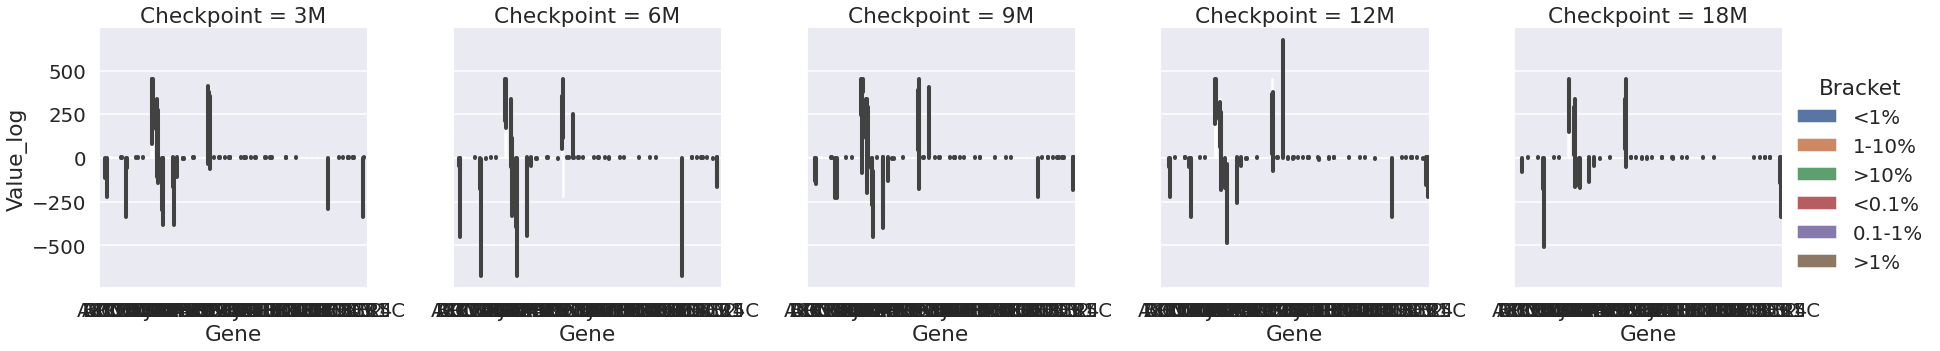

In [ ]:
sns.catplot(data=df, x='Gene', col="Checkpoint", y='Value_log', hue='Bracket', kind='bar')

In [ ]:
df = df.drop(columns=["Category", "Patient", "WNT2","DLL1"])

In [ ]:
df['log_AXIN1'] = np.log10(df['AXIN1'])
df['log_CDC25C'] = np.log10(df['CDC25C'])
df['log_CCND1'] = np.log10(df['CCND1'])
df['log_NANOG'] = np.log10(df['NANOG'])
# Drop the non-transformed columns
df = df.drop(columns = ['AXIN1', 'CDC25C', 'CCND1', 'NANOG'])

In [ ]:
df

,Checkpoint,Bracket,log_AXIN1,log_CDC25C,log_CCND1,log_NANOG
0,3M,<1%,-0.452225,1.113943,0.670246,0.556303
1,3M,<1%,0.089905,0.187521,0.136721,1.079181
2,3M,<1%,-97.821023,-292.443697,0.829947,1.679428
3,3M,<1%,0.583199,0.746634,0.285557,0.271842
4,3M,<1%,-0.146302,0.485721,0.612784,-0.306273
...,...,...,...,...,...,...
109,18M,<0.1%,-0.337242,1.170262,1.539076,-0.129011
110,18M,0.1-1%,-0.134896,1.296665,0.611723,1.149219
111,18M,0.1-1%,-0.275724,0.588832,0.941014,0.290035
112,18M,0.1-1%,0.488551,1.136721,0.201397,-0.252588


In [ ]:
df.describe()

,log_AXIN1,log_CDC25C,log_CCND1,log_NANOG
count,114.000000,112.000000,113.000000,114.000000
mean,-14.605694,-19.142626,0.714826,0.605834
std,43.642516,69.799557,0.501704,0.665271
min,-195.962574,-292.443697,-0.407823,-0.653647
25%,-0.579258,0.595479,0.285557,0.037426
50%,-0.107905,1.113943,0.670246,0.580804
75%,0.414076,1.184691,0.962369,1.123237
max,0.784617,1.614897,1.587711,2.271842


In [ ]:
df.corr()

,log_AXIN1,log_CDC25C,log_CCND1,log_NANOG
log_AXIN1,1.000000,0.324741,-0.325179,-0.509058
log_CDC25C,0.324741,1.000000,0.119356,-0.313193
log_CCND1,-0.325179,0.119356,1.000000,0.336922
log_NANOG,-0.509058,-0.313193,0.336922,1.000000


In [ ]:
df.cov()

,log_AXIN1,log_CDC25C,log_CCND1,log_NANOG
log_AXIN1,1904.669197,997.228521,-7.148768,-14.780048
log_CDC25C,997.228521,4871.978188,4.153490,-14.645561
log_CCND1,-7.148768,4.153490,0.251707,0.112743
log_NANOG,-14.780048,-14.645561,0.112743,0.442585


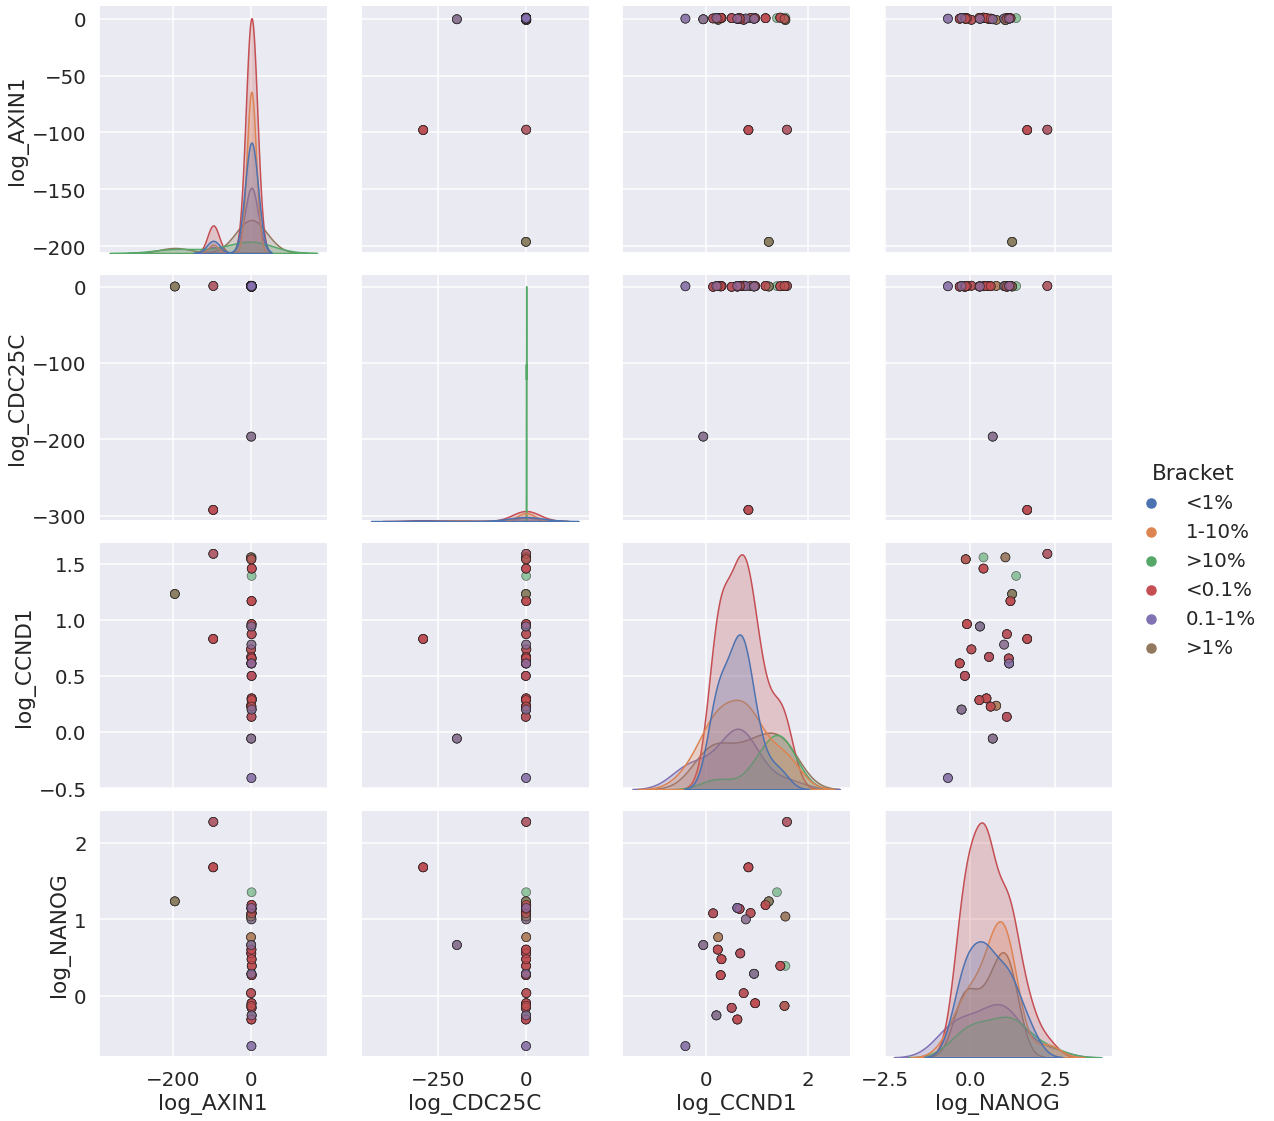

In [ ]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

# Define a summary function
def summary(x, **kwargs):
    # Convert to a pandas series
    x = pd.Series(x)
    
    # Get stats for the series
    label = x.describe()[['mean', 'std', 'min', '50%', 'max']]
    
    # Convert from log to regular scale
    # Adjust the column names for presentation
    # if label.name == 'log_pop':
    #     label = 10 ** label
    #     label.name = 'pop stats'
    # elif label.name == 'log_gdp_per_cap':
    #     label = 10 ** label
    #     label.name = 'gdp_per_cap stats'
    # else:
    #     label.name = 'life_exp stats'
       
    # Round the labels for presentation
    label = label.round()
    ax = plt.gca()
    ax.set_axis_off()

    # Add the labels to the plot
    ax.annotate(pd.DataFrame(label),
               xy = (0.1, 0.2), size = 20, xycoords = ax.transAxes)    
    

sns.pairplot(df, hue = 'Bracket', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 4)
# Create a pair grid instance
# grid = sns.PairGrid(df,
#                     hue = 'Bracket', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 4,
#                     vars = ['log_AXIN1',	'log_CDC25C',	'log_CCND1',	'log_NANOG'])

# Fill in the mappings
# grid = grid.map_upper(plt.scatter, color = 'darkred')
# grid = grid.map_upper(plt.scatter)
# grid = grid.map_upper(corr)
# # grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
# grid = grid.map_lower(sns.kdeplot)
# # grid = grid.map_diag(summary);

In [ ]:
# find the patients that went from critical to steady then safe

critical_3M = np.unique(df[(df.Category == 'Critical') & (df.Checkpoint == '3M')].Patient)
steady_3M = np.unique(df[(df.Category == 'Steady') & (df.Checkpoint == '3M')].Patient)
union_3M = np.union1d(steady_3M, critical_3M)
union_3M


critical_6M = np.unique(df[(df.Category == 'Critical') & (df.Checkpoint == '6M')].Patient)
steady_6M = np.unique(df[(df.Category == 'Steady') & (df.Checkpoint == '6M')].Patient)
safe_6M = np.unique(df[(df.Category == 'Safe') & (df.Checkpoint == '6M')].Patient)
union_6M = np.union1d(steady_6M, critical_6M)

intersect_6M = np.intersect1d(union_3M, np.union1d(safe_6M, union_6M))
intersect_6M


# critical_12M = np.unique(df[(df.Category == 'Critical') & (df.Checkpoint == '12M')].Patient)
steady_12M = np.unique(df[(df.Category == 'Steady') & (df.Checkpoint == '12M')].Patient)
safe_12M = np.unique(df[(df.Category == 'Safe') & (df.Checkpoint == '12M')].Patient)
union_12M = np.union1d(steady_12M, critical_12M)

# intersect_12M = np.intersect1d(intersect_6M, np.union1d(safe_12M, union_12M))
intersect_12M = np.intersect1d(intersect_6M, np.union1d(safe_12M, steady_12M))
intersect_12M


safe_18M = np.unique(df[(df.Category == 'Safe') & (df.Checkpoint == '18M')].Patient)

intersect_18M = np.intersect1d(intersect_12M, safe_18M)
intersect_18M
target_patients = intersect_18M
target_patients

array(['MNC 0188JMJ', 'MNC 0189SF', 'MNC 0300EC', 'MNC 0301MG',
       'MNC 0431JW', 'MNC 0513SW'], dtype=object)

In [ ]:
target_df = df[df.Patient.isin(target_patients)]
target_df

,Patient,Checkpoint,Bracket,Category,Gene,Value
312,MNC 0188JMJ,3M,1-10%,Steady,APC,1.142066
313,MNC 0188JMJ,3M,1-10%,Steady,AXIN1,2.808874
314,MNC 0188JMJ,3M,1-10%,Steady,BIRC5,38.680390
315,MNC 0188JMJ,3M,1-10%,Steady,CCNA1,0.871179
316,MNC 0188JMJ,3M,1-10%,Steady,CCNA2,8.981640
...,...,...,...,...,...,...
5611,MNC 0513SW,18M,<0.1%,Safe,CCNB1,6.858305
5612,MNC 0513SW,18M,<0.1%,Safe,CCNB2,16.409650
5613,MNC 0513SW,18M,<0.1%,Safe,FOXM1,37.625280
5614,MNC 0513SW,18M,<0.1%,Safe,CXCR4,0.287589


In [ ]:
genes = np.unique(df.Gene)
genes

array(['APC', 'AXIN1', 'BIRC5', 'BMP2', 'BMPR1A', 'BMPR1B', 'CCNA1',
       'CCNA2', 'CCNB1', 'CCNB2', 'CCND1', 'CCND2', 'CCND3', 'CCNE1',
       'CCNE2', 'CD44', 'CDC25C', 'CDC45', 'CDC6', 'CDC7', 'CK2', 'CXCR4',
       'DKK1', 'DKK4', 'DLL1', 'DLL3', 'FOXM1', 'ICAM1', 'JAG1', 'JUNB',
       'LEF1', 'MMP2', 'MMP7', 'MMP9', 'MYC', 'NANOG', 'PARP1', 'RUNX1',
       'RUNX1T1', 'RUNX2', 'RYK', 'SFRP4', 'SNAIL1', 'TCF3', 'TCF4',
       'TCF7', 'TLE1', 'TLE2', 'TLE3', 'TLE4', 'VEGFA', 'WNT2'],
      dtype=object)

In [ ]:
# fig = make_subplots(rows=len(genes))
fig = make_subplots(rows=len(genes), cols=len(target_patients))

for i, gene in enumerate(genes, start=1):
  for j, patient in enumerate(target_patients, start=1):
    name = patient + ':' + gene
    selected_df = target_df[(target_df.Gene == gene) & (target_df.Patient == patient)]
    fig.add_trace(
        go.Scatter(
            name=name,
            x=selected_df.Checkpoint,
            y=selected_df.Value,
            text=target_patients,
            mode='markers'
        ),
        row=i, col=j
    )

fig.update_layout(height=300 * len(genes))
fig.show()

In [ ]:
# px.box(target_df[target_df.Gene == 'APC'], x="Checkpoint", y="Value", points="all", log_y=True)

In [ ]:
# px.box(df[df.Category == 'Steady'], x="Checkpoint", y="APC", points="all")